In [221]:
from math import sqrt, factorial
from fractions import Fraction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import zip_longest
plt.style.use('classic')
%matplotlib inline

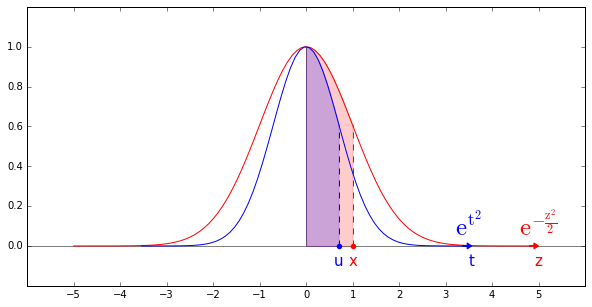

In [222]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.axhline(0, color='tab:gray', lw=1, zorder=0)
ax.vlines(0, 0, 1, color='tab:gray', lw=1, zorder=0)

x = 1
z = np.arange(-5, 5, 0.1)
z_plus = np.arange(0, x+0.001, 0.1)

u = x/sqrt(2)
t = np.arange(-5/sqrt(2), 5/sqrt(2), 0.1)
t_plus = np.arange(0, u, 0.1)

ax.plot(z, np.exp(-z**2/2), color='red')
ax.fill_between(z_plus, 0, np.exp(-z_plus**2/2), color='red', alpha=0.2)
ax.arrow(z[-1]-0.1, 0, 0.1, 0, color='red', head_width=0.03, head_length=0.1)
ax.text(z[-1]+0.1, -0.1, 'z', color='red', horizontalalignment='center', fontsize=15)
ax.scatter(x, 0, color='red')
ax.vlines(x, 0, np.exp(-x**2/2), linestyle='--', linewidth=1, color='red')
ax.text(x, -0.1, 'x', color='red', horizontalalignment='center', fontsize=15)

ax.plot(t, np.exp(-t**2), color='blue')
ax.fill_between(t_plus, 0, np.exp(-t_plus**2), color='blue', alpha=0.2)
ax.arrow(t[-1]-0.1, 0, 0.1, 0, color='blue', head_width=0.03, head_length=0.1, zorder=10)
ax.text(t[-1]+0.1, -0.1, 't', color='blue', horizontalalignment='center', fontsize=15)
ax.scatter(u, 0, color='blue')
ax.vlines(u, 0, np.exp(-u**2), linestyle='--', linewidth=1, color='blue')
ax.text(u, -0.1, 'u', color='blue', horizontalalignment='center', fontsize=15)

ax.set_xticks(range(-5, 6))
ax.set_yticks(np.arange(0, 1.01, 0.2))

ax.text(5, 0.05, r'$\mathrm{e^{-\frac{z^{2}}{2}}}$', color='red', fontsize=25, horizontalalignment='center')
ax.text(3.5, 0.05, r'$\mathrm{e^{t^{2}}}$', color='blue', fontsize=25, horizontalalignment='center')
plt.show()

In [184]:
f = 0
f1 = 1

In [219]:
def update_p(p, n):
    dp = [power * coeff for power, coeff in enumerate(p)][1:]
    pf = [0] + p
    two_npf = [2*n*coeff for coeff in pf]
    return [dp_coeff + two_npf_coeff for dp_coeff, two_npf_coeff in zip_longest(two_npf, dp, fillvalue=0)]

In [245]:
p = [0, 2]
for n in range(2, 10):
    const = p[0]
    print(Fraction(const, (factorial(n) * 2**(n-1))))
    
    p = update_p(p, n)

0
1/12
0
7/480
0
127/40320
0
4369/5806080
